# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import itertools 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import spacy
from spacy import displacy
nlp= spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'numpy'

# Data Preprocessing Function

In [ ]:
def pre_processing(data_text):
    documents = []
    stemmer = WordNetLemmatizer()
    for sen in range(0, len(data_text)):
        document = re.sub(r'\W', ' ', str( data_text[sen]))
        document = re.sub(re.escape(string.punctuation), '', document)
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
        document = re.sub(r'\s+',' ',document, flags=re.I)
        document = re.sub(r'^b\s+', '',document)
        document = re.sub(r'^\s', '',document)
        document = re.sub(r'\s$', '',document)
        document = document.lower()

        document = document.split()
        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        document = [ word for word in document.split() if word not in stopwords.words("english")]
        document = ' '.join(document)
        
        if(re.search(r'^\s*$',document)!=None):
            continue
        if not document:
            continue

        documents.append(document)
        print(sen)
    return documents

# Data Scraping Function

In [ ]:
def url_script(url):
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.70 Safari/537.36'}
    page = requests.get(url,headers=headers).text
    soup = BeautifulSoup(page,'lxml')
    text = [ p.text for p in soup.find_all('p')]
    print(url)
    return text

# List of URLs

In [ ]:
urls=['https://www.investopedia.com/terms/d/data-analytics.asp',
      'https://www.mastersindatascience.org/learning/what-is-data-analytics/',
      'https://searchdatamanagement.techtarget.com/definition/data-analytics',
      'https://www.lotame.com/what-is-data-analytics/',
      'https://www.thinkful.com/blog/data-analytics-blogs/',
      'https://www.tibco.com/reference-center/what-is-data-analytics',
      'https://www.simplilearn.com/data-science-vs-big-data-vs-data-analytics-article',
      'https://www.ibm.com/analytics/hadoop/big-data-analytics',
      'https://www.teradata.com/Blogs/5-Big-Benefits-of-Data-and-Analytics-for-Positive-Business-Outcomes',
      'https://www.bmc.com/blogs/data-analytics-vs-data-analysis/',
      'https://www.accaglobal.com/in/en/student/exam-support-resources/professional-exams-study-resources/p7/technical-articles/data-analytics.html',
      'https://www.stitchdata.com/resources/benefits-of-data-analytics/',
      'https://www.qubole.com/big-data-analytics/',
      'https://www.dickinson.edu/homepage/1474/data_analytics',
      'https://www.dmu.ac.uk/study/courses/postgraduate-courses/data-analytics-msc-degree/data-analytics-msc-degrees.aspx',
      'https://www.statistics.com/data-analytics/',
      'https://www.scnsoft.com/blog/4-types-of-data-analytics',
      'https://www.dataversity.net/brief-history-analytics/',
      'https://www.sabanciuniv.edu/en/data-analytics',
      'https://www.northeastern.edu/graduate/blog/data-analytics-vs-data-science/',
      'https://www.mckinsey.com/business-functions/mckinsey-digital/our-insights/making-data-analytics-work-for-you-instead-of-the-other-way-around',
      'https://www.eweek.com/big-data-and-analytics/data-analytics-trends/',
      'https://corporatefinanceinstitute.com/resources/knowledge/other/data-analytics/',
      'https://chartio.com/learn/data-analytics/types-of-data-analysis/',
      'https://www.intel.com/content/www/us/en/analytics/what-is-data-analytics.html',
      'https://www.omnisci.com/learn/big-data-analytics',
      'https://www.lighthouselabs.ca/en/blog/the-five-stages-of-data-analysis',
      'https://www.bdo.com.au/en-au/services/advisory/consulting/data-analytics/what-is-data-analytics',
      'https://www.journalofaccountancy.com/issues/2016/aug/data-analytics-skills.html',
      'https://www.retail-insight-network.com/dashboards/data-analytics-hiring-levels-in-the-retail-industry-rose-in-october-2021/',
      'https://www.ironhack.com/en/data-analytics/data-science-data-analytics',
      'https://www.comptia.org/blog/best-data-analytics-certifications',
      'https://www.kenan-flagler.unc.edu/perspectives/why-data-analytics-matter-to-accountants/',
      'https://www.apm.org.uk/resources/what-is-project-management/what-is-project-data-analytics/',
      'https://www.techopedia.com/definition/26418/data-analytics',
      'https://www.clearrisk.com/risk-management-blog/challenges-of-data-analytics-0',
      'https://iterationinsights.com/article/where-to-start-with-the-4-types-of-analytics/',
      'https://www.packaging-gateway.com/uncategorised/data-analytics-hiring-levels-in-the-packaging-industry-rose-in-october-2021/',
      'https://www.naval-technology.com/analysis/data-analytics-hiring-levels-in-the-naval-industry-rose-in-october-2021/',
      'https://www.getsmarter.com/blog/career-advice/difference-data-analytics-data-analysis/',
     ]
raw_data=[]
cleaned_data=[]

# Loop to Scrap and Clean the Data

In [ ]:
x=1
for i in urls:
    print(x)
    text=url_script(i)
    raw_text=[' '.join(text)]
    raw_data.extend(raw_text)
    clean_text=[' '.join(pre_processing(text))]
    cleaned_data.extend(clean_text)
    x+=1
print(raw_data)
    

1
https://www.investopedia.com/terms/d/data-analytics.asp
2
https://www.mastersindatascience.org/learning/what-is-data-analytics/
3
https://searchdatamanagement.techtarget.com/definition/data-analytics
4
https://www.lotame.com/what-is-data-analytics/
5
https://www.thinkful.com/blog/data-analytics-blogs/
6
https://www.tibco.com/reference-center/what-is-data-analytics
7
https://www.simplilearn.com/data-science-vs-big-data-vs-data-analytics-article
8
https://www.ibm.com/analytics/hadoop/big-data-analytics
9
https://www.teradata.com/Blogs/5-Big-Benefits-of-Data-and-Analytics-for-Positive-Business-Outcomes
10
https://www.bmc.com/blogs/data-analytics-vs-data-analysis/
11
https://www.accaglobal.com/in/en/student/exam-support-resources/professional-exams-study-resources/p7/technical-articles/data-analytics.html
12
https://www.stitchdata.com/resources/benefits-of-data-analytics/
13
https://www.qubole.com/big-data-analytics/
14
https://www.dickinson.edu/homepage/1474/data_analytics
15
https://ww

# Comparing Length of Raw and Cleaned Data

In [ ]:
print(len(raw_data))
print(len(cleaned_data))

57
57


# Creating Dataframe of Raw and Cleaned Data

In [ ]:
df1 = pd.DataFrame()
df1['Raw Data']= raw_data
df1["Cleaned Data"]= cleaned_data

# Saving the DataFrame into a CSV File

In [ ]:
df1.to_csv("N:\\Universty_Data\\6th_Semester\\Topics in Computer Science I (TICS)\\TICS Quizzes and Assignments\\TICS Assignment-4\\clean_data.csv",index=False)

# Reading DataSet from the CSV File into a DataFrame

In [ ]:
df2=pd.read_csv("N:\\Universty_Data\\6th_Semester\\Topics in Computer Science I (TICS)\\TICS Quizzes and Assignments\\TICS Assignment-4\\clean_data1.csv")

In [ ]:
df2.head()

,Raw Data,Cleaned Data
0,\nData analytics is the science of analyzing r...,data analytics science analyzing raw data make...
1,Master's in Data Science As the process of ana...,master data science process analyzing raw data...
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set o...
3,Data can help businesses better understand the...,data help business better understand customer ...
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...


# Sentiment Analysis

In [ ]:
TextBlob(df2["Cleaned Data"].iloc[0]).sentiment

Sentiment(polarity=0.10620211487858545, subjectivity=0.43682822079880895)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, ngram_range=(1,3),stop_words=stopwords.words('english'))
x = tfidfconverter.fit_transform(df2["Cleaned Data"]).toarray()
print(x)

[[0.         0.         0.         ... 0.03187167 0.03469438 0.        ]
 [0.         0.         0.         ... 0.04011034 0.02183135 0.        ]
 [0.         0.         0.         ... 0.         0.01962239 0.        ]
 ...
 [0.         0.         0.         ... 0.03341859 0.         0.14551318]
 [0.         0.         0.         ... 0.033275   0.         0.14488797]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
tfidfconverter.get_feature_names()

C:\Users\nasrullah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '10',
 '100',
 '12',
 '18',
 '2020',
 '2021',
 'ability',
 'able',
 'access',
 'accessible',
 'according',
 'accuracy',
 'accurate',
 'achieve',
 'acquire',
 'across',
 'across industry',
 'act',
 'action',
 'actionable',
 'actionable insight',
 'activity',
 'add',
 'added',
 'addition',
 'additional',
 'address',
 'advance',
 'advanced',
 'advanced analytics',
 'advantage',
 'advertisement',
 'advertising',
 'affect',
 'age',
 'agree',
 'ai',
 'aim',
 'alert',
 'algorithm',
 'aligning',
 'allow',
 'allowing',
 'allows',
 'already',
 'also use',
 'although',
 'always',
 'amazon',
 'among',
 'amount',
 'amount data',
 'analysis data',
 'analysis data analytics',
 'analyst',
 'analytic',
 'analytical',
 'analytics also',
 'analytics big',
 'analytics business',
 'analytics company',
 'analytics data',
 'analytics data science',
 'analytics ha',
 'analytics help',
 'analytics include',
 'analytics initiative',
 'analytics one',
 'analytics predictive',
 'analytics prescriptive',


In [ ]:
len(tfidfconverter.get_feature_names())

1015

# Finding Frequency Distribution of Dataset

In [ ]:
df2['Cleaned Data'][:]

0     data analytics science analyzing raw data make...
1     master data science process analyzing raw data...
2     data analytics da process examining data set o...
3     data help business better understand customer ...
4     data analytics data analyst lead charge collec...
5     data analytics enables organization analyze da...
6     data everywhere part daily life way u realize ...
7     ibm leverage effective big data technology ana...
8     get latest industry news technology trend data...
9     data analysis data analytics two term concept ...
10    global body professional accountant find locat...
11    rich variety data enterprise generate contains...
12    big data analytics offer nearly endless source...
13    data analytics data heart many today daunting ...
14    developed collaboration sa world leader field ...
15    explore course elder research contact lm login...
16    alex bekker head data analytics department sci...
17    historically speaking simple definition an

In [ ]:
fdist = FreqDist()
for x in str(df2['Cleaned Data'][:]).split():
    fdist[x]+=1

len(fdist)

234

In [ ]:
fdist.most_common(10)

[('data', 32),
 ('analytics', 15),
 ('...', 8),
 ('big', 5),
 ('science', 3),
 ('analyzing', 3),
 ('raw', 3),
 ('technology', 3),
 ('proportion', 3),
 ('company', 3)]

In [ ]:
#df2['Polarity']=df2["Cleaned Data"].apply(lambda x : TextBlob(x).sentiment[0])
#df2['Subjectivity']=df2["Cleaned Data"].apply(lambda x : TextBlob(x).sentiment[1])
df2['Length']=df2["Cleaned Data"].apply(lambda x : len(x.split()))
df2.head()

,Raw Data,Cleaned Data,Length
0,\nData analytics is the science of analyzing r...,data analytics science analyzing raw data make...,391
1,Master's in Data Science As the process of ana...,master data science process analyzing raw data...,702
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set o...,1046
3,Data can help businesses better understand the...,data help business better understand customer ...,1031
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,946


In [ ]:
df2.to_csv("N:\\Universty_Data\\6th_Semester\\Topics in Computer Science I (TICS)\\TICS Quizzes and Assignments\\TICS Assignment-4\\scrapdata_sentiment1.csv",index=False)

In [ ]:
pd.read_csv("N:\\Universty_Data\\6th_Semester\\Topics in Computer Science I (TICS)\\TICS Quizzes and Assignments\\TICS Assignment-4\\scrapdata_sentiment1.csv")

,Raw Data,Cleaned Data,Length
0,\nData analytics is the science of analyzing r...,data analytics science analyzing raw data make...,391
1,Master's in Data Science As the process of ana...,master data science process analyzing raw data...,702
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set o...,1046
3,Data can help businesses better understand the...,data help business better understand customer ...,1031
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,946
5,Data analytics enables organizations to analyz...,data analytics enables organization analyze da...,994
6,Data is everywhere and part of our daily lives...,data everywhere part daily life way u realize ...,560
7,\nIBM\n\n\n\n\n\n\n \nLeverage effective big d...,ibm leverage effective big data technology ana...,437
8,"Get the latest industry news, technology trend...",get latest industry news technology trend data...,760
9,"Data analysis, data analytics. Two terms for t...",data analysis data analytics two term concept ...,541


# Extract features based on sentiments (positive, negative, neutral, and compound), polarity subjectivity and length

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
df2[['Polarity', 'Subjectivity']] = df2['Cleaned Data'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df2['Cleaned Data'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df2.loc[index, 'Class_Label'] = "negative"
    elif pos > neg:
        df2.loc[index, 'Class_Label'] = "positive"
    else:
        df2.loc[index, 'Class_Label'] = "neutral"
    df2.loc[index, 'neg'] = neg
    df2.loc[index, 'neu'] = neu
    df2.loc[index, 'pos'] = pos
    df2.loc[index, 'compound'] = comp
df2.head()

,Raw Data,Cleaned Data,Length,Polarity,Subjectivity,Class_Label,neg,neu,pos,compound
0,\nData analytics is the science of analyzing r...,data analytics science analyzing raw data make...,391,0.106202,0.436828,positive,0.042,0.753,0.205,0.9968
1,Master's in Data Science As the process of ana...,master data science process analyzing raw data...,702,0.135294,0.494345,positive,0.024,0.785,0.191,0.9989
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set o...,1046,0.080697,0.391671,positive,0.018,0.854,0.128,0.9985
3,Data can help businesses better understand the...,data help business better understand customer ...,1031,0.151186,0.458372,positive,0.015,0.737,0.247,0.9998
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,946,0.176233,0.386873,positive,0.018,0.732,0.250,0.9997


In [ ]:
sid = SentimentIntensityAnalyzer()
df2[['neg', 'neu', 'pos', 'compound']] = df2['Cleaned Data'].apply(sid.polarity_scores).apply(pd.Series)
df2.head()

,Raw Data,Cleaned Data,Length,Polarity,Subjectivity,Class_Label,neg,neu,pos,compound
0,\nData analytics is the science of analyzing r...,data analytics science analyzing raw data make...,391,0.106202,0.436828,positive,0.042,0.753,0.205,0.9968
1,Master's in Data Science As the process of ana...,master data science process analyzing raw data...,702,0.135294,0.494345,positive,0.024,0.785,0.191,0.9989
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set o...,1046,0.080697,0.391671,positive,0.018,0.854,0.128,0.9985
3,Data can help businesses better understand the...,data help business better understand customer ...,1031,0.151186,0.458372,positive,0.015,0.737,0.247,0.9998
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,946,0.176233,0.386873,positive,0.018,0.732,0.250,0.9997


# Save the extracted features in new csv file.

In [ ]:
df2.to_csv("N:\\Universty_Data\\6th_Semester\\Topics in Computer Science I (TICS)\\TICS Quizzes and Assignments\\TICS Assignment-4\\FinalResult_data.csv",index=False)

In [ ]:
df3=pd.read_csv("N:\\Universty_Data\\6th_Semester\\Topics in Computer Science I (TICS)\\TICS Quizzes and Assignments\\TICS Assignment-4\\FinalResult_data.csv")
df3.head()

,Raw Data,Cleaned Data,Length,Polarity,Subjectivity,Class_Label,neg,neu,pos,compound
0,\nData analytics is the science of analyzing r...,data analytics science analyzing raw data make...,391,0.106202,0.436828,positive,0.042,0.753,0.205,0.9968
1,Master's in Data Science As the process of ana...,master data science process analyzing raw data...,702,0.135294,0.494345,positive,0.024,0.785,0.191,0.9989
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set o...,1046,0.080697,0.391671,positive,0.018,0.854,0.128,0.9985
3,Data can help businesses better understand the...,data help business better understand customer ...,1031,0.151186,0.458372,positive,0.015,0.737,0.247,0.9998
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,946,0.176233,0.386873,positive,0.018,0.732,0.250,0.9997


# Visualization of DataSet

<AxesSubplot:xlabel='Length', ylabel='Subjectivity'>

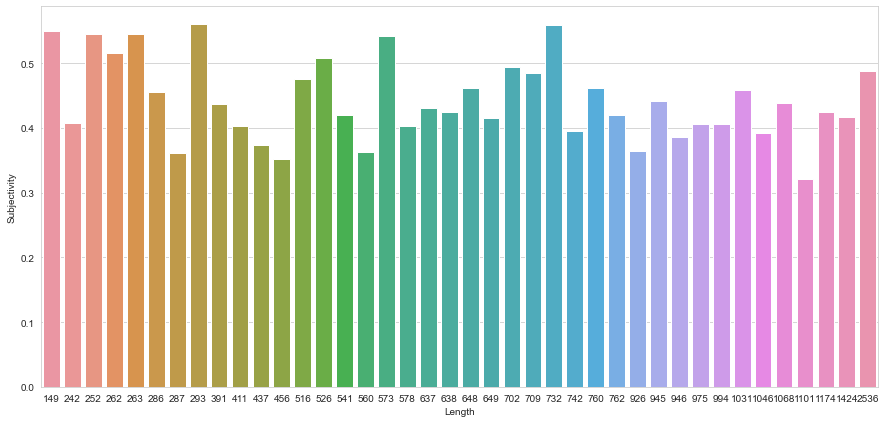

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df3,x="Length",y="Subjectivity")

<AxesSubplot:xlabel='Length', ylabel='Polarity'>

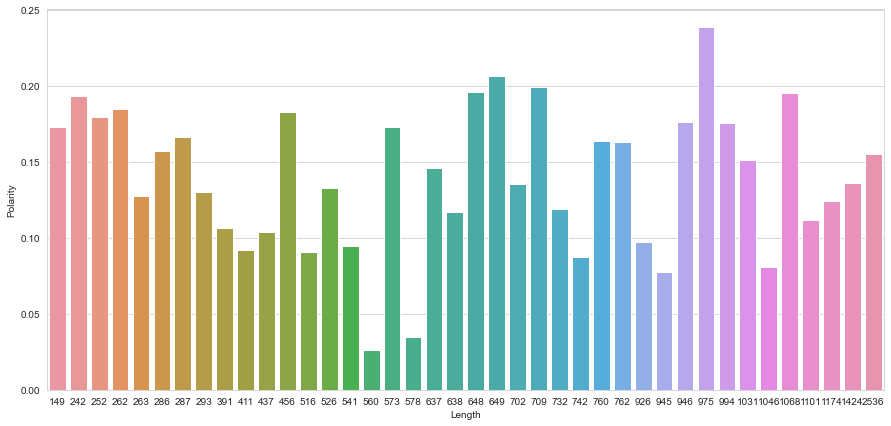

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df3,x="Length",y="Polarity")

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25')])

<Figure size 1080x504 with 0 Axes>

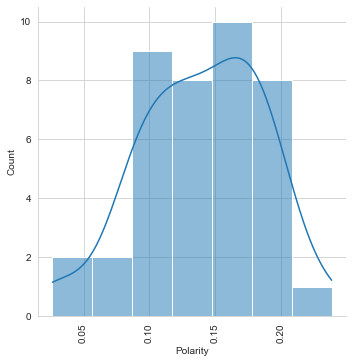

In [ ]:
plt.figure(figsize=(15,7))
sns.displot(df3[df3['Polarity']>0]['Polarity'][:50],kde=True)
plt.xticks(rotation=90)

<Figure size 1080x504 with 0 Axes>

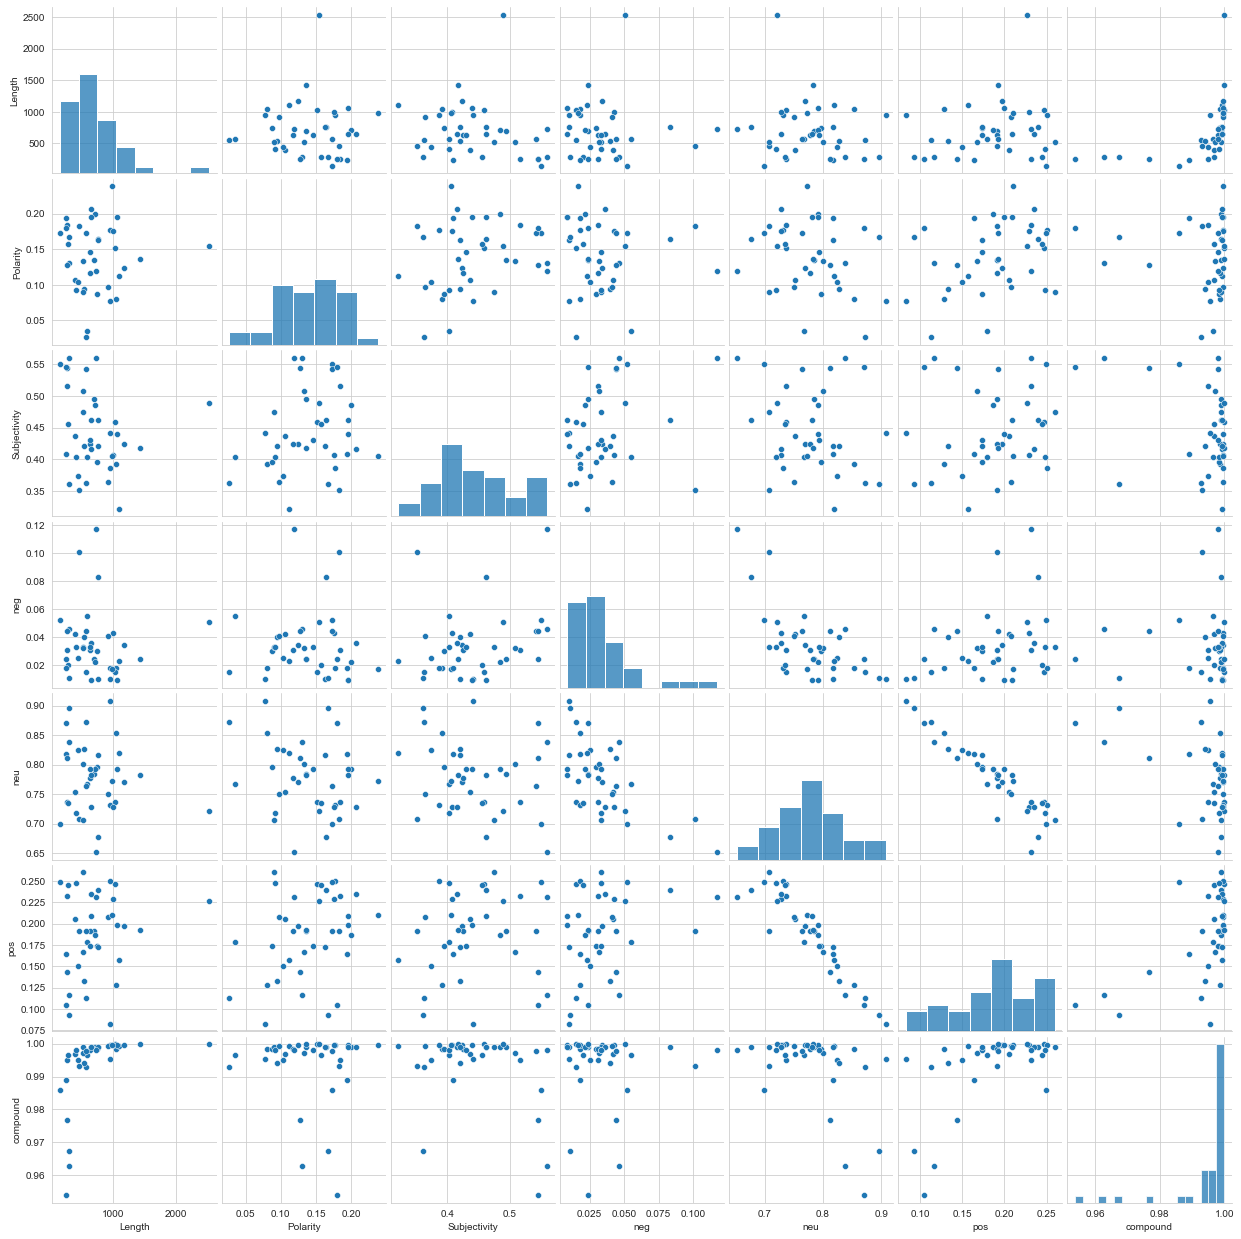

In [ ]:
plt.figure(figsize=(15,7))
sns.pairplot(df3)

<AxesSubplot:ylabel='Frequency'>

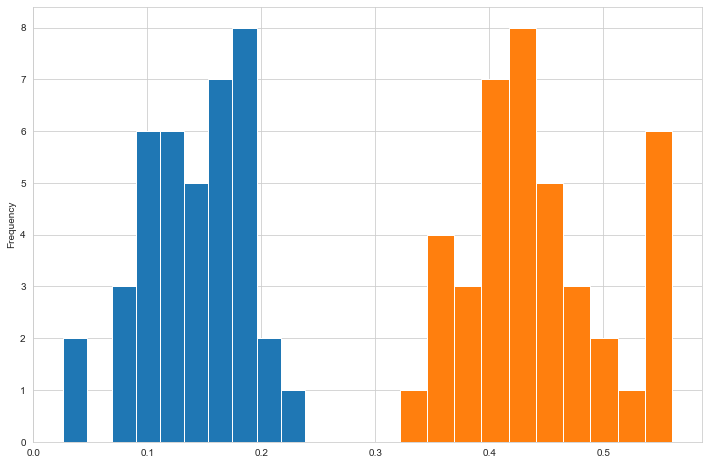

In [ ]:
plt.figure(figsize=(12,8))
df3['Polarity'].plot(kind='hist')
df3['Subjectivity'].plot(kind='hist')

<AxesSubplot:>

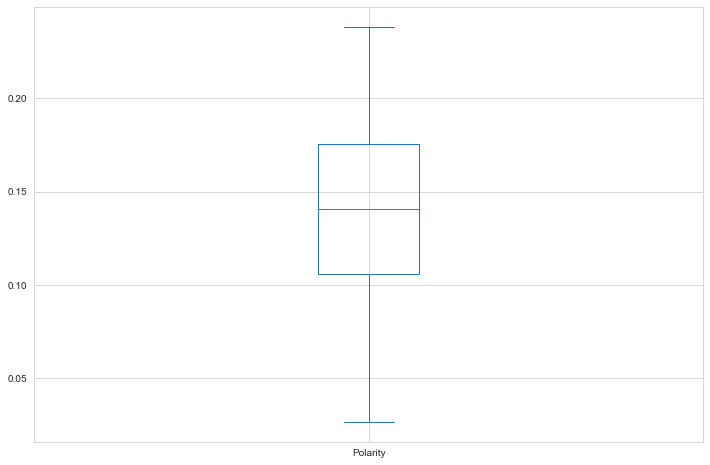

In [ ]:
plt.figure(figsize=(12,8))
df3['Polarity'].plot(kind='box')

<AxesSubplot:>

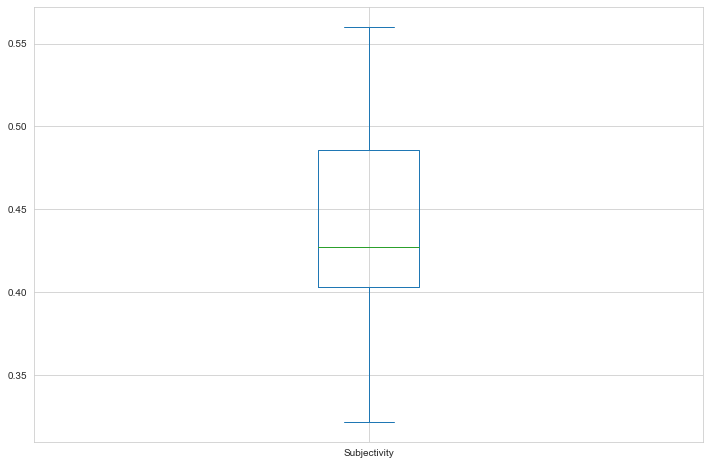

In [ ]:
plt.figure(figsize=(12,8))
df3['Subjectivity'].plot(kind='box')

In [ ]:
doc=nlp(df3["Cleaned Data"].iloc[0])
displacy.render(doc)
#ax=plt.axes()
#ax.set_facecolor("red")

# WordCloud 

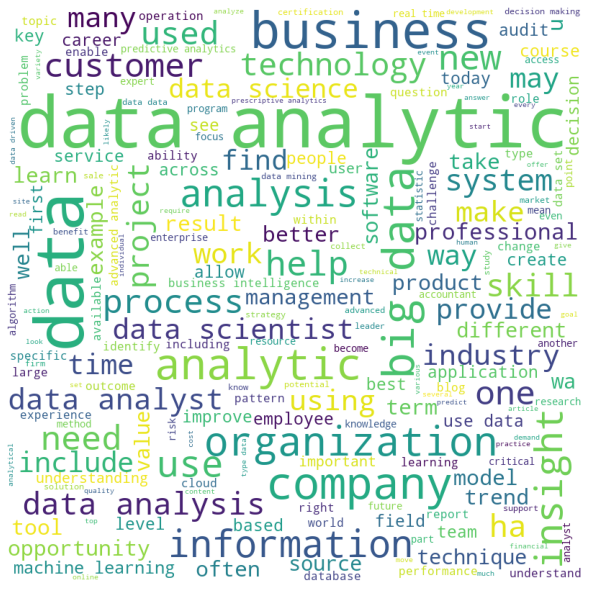

In [ ]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)

for val in df3["Cleaned Data"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Classification

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = RandomForestClassifier()

x=df3[["Length","Polarity","Subjectivity","neg","neu","pos","compound"]].values
y=df3["Class_Label"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, y_train.shape

((28, 7), (28,))

In [ ]:
x_test.shape, y_test.shape

((12, 7), (12,))

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
print(clf.predict(x_test))

['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive']


In [ ]:
clf.fit(x_train, y_train).score(x_test, y_test)

1.0

In [ ]:
from pandas.plotting import scatter_matrix
import sklearn
from sklearn import tree
from sklearn import datasets, model_selection
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
results=[]
names=[]

In [ ]:
for name, model in models:
    kfold=model_selection .KFold(n_splits=10)
    cv_results=model_selection .cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR : nan (nan)
KNN : 1.000000 (0.000000)
DT : 1.000000 (0.000000)
SVM : nan (nan)


C:\Users\nasrullah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nasrullah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nasrullah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1554, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'positive'

  warnings.warn(some_fits_failed_message, FitFai

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
dt_cl=tree.DecisionTreeClassifier(max_depth=5)
dt_cl.fit(x_train, y_train)
dt_cl.score(x_test, y_test)

1.0

In [4]:
y_prd=dt_cl.predict(x_test)
dt_cl.score(x_test, y_test)

NameError: name 'dt_cl' is not defined

In [ ]:
y_prd=dt_cl.predict(x_test)
confusion_matrix(y_test, y_prd)

array([[12]], dtype=int64)

In [ ]:
rf_cl=ensemble.RandomForestClassifier(n_estimators=100)
rf_cl.fit(x_train, y_train)
rf_cl.score(x_test, y_test)

1.0

# Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[12]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

1.0